In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### Explaining the transition to becoming loss averse as a function of the size of the bet

### Introduction
Loss aversion is the tendency to prefer avoiding losses to acquiring equivalent gains. Loss aversion was first identified by Amos Tversky and Daniel Kahneman (1). Loss aversion implies that one who loses a hundred dollars will lose more satisfaction than the same person will gain satisfaction from a 100 dollar windfall.<br>

Multiple studies have questioned the existence of loss aversion. In several studies examining the effect of losses in decision-making, no loss aversion was found under risk and uncertainty (2). There are several explanations for these findings: one, is that loss aversion does not exist in small payoff magnitudes (called magnitude dependent loss aversion by Mukherjee et al.(2017) (3). <br>

On the other hand, there is also an extensive amount of research demonstrating the presence of loss aversion (for instance: 4, 5, 6). A common situation in which loss aversion is present is for instance the *high EV* (expected value) case: <br>
> *Imagine that you have the opportunity to play a gamble that offers a 50 percent chance to win
2000 dollars and a 50 percent chance to lose 500 dollars. Would you play the gamble?* <br>

The above case is certainly an advantageous bet. It is noted in (4) that people were more inclided to accept the bet when they could play a multitude of times, compared to when it was a one time offer. This difference demonstrates the existence of loss aversion, by the simple observation that not everybody accepted the one time bet. <br>

In this article we will try to merge the two branches of literature. We will argue that there is a domain where loss aversion is not expected to be observed (the *small bet* domain) and a domain where loss aversion is expected to be observed (the *large bet* domain). We will also create a statement regarding the transition between the both regimes.
To our knowledge, this connection between both ends of the spectrum is new. <br>

Our thesis is roughly based on the following argumentation: <br>
Suppose we offer you an advantageous bet with 70 percent chance to double your money, and 30 percent chance to loose your investment. Suppose you are a person that accepts this bet and you are willing to bet a proportion P of all your money. Then, for a sufficiently large P, you are exected to go bankrupt. <br>
The key assumptions underlying the last statement is that these types of bets will occur multiple times during your lifetime, and that you are a person that *always* bets a large proportion of your total worth in these cases. <br>
Under these assumptions we will show that people that are inclined to bet large are expected to go bankrupt, and people that bet small will not. This provides argumentation for the existence of a boundary amount P*, above which people are expected to behave loss averse. <br>

In previous research, the connection between one time bets and iterative bets has been investigated (4, meer zoeken). A key difference is that in our framework the bets payoffs and investments are not constant. In our framework, a fixed proportion of the total bankroll of a subject is the bet. This bankroll changes as the person wins or loses bets.

### Wat meer fluff
Lorem ipsum dolor sit amet, consectetur adipiscing elit. Morbi suscipit tempus lorem, non dignissim libero rutrum convallis. Sed dignissim cursus ornare. Aenean suscipit imperdiet pulvinar. Nullam interdum orci sed libero ultrices tincidunt. Nullam lobortis odio nec venenatis tincidunt. Donec lacinia ullamcorper eros, nec porttitor nisl viverra id. Proin at finibus neque, vel porta elit. Praesent lacus tellus, euismod vitae efficitur vel, gravida sed orci. Suspendisse potenti. Suspendisse aliquam mauris eu efficitur dignissim. Suspendisse quis gravida velit. Quisque leo ante, fringilla vitae aliquet a, congue tincidunt lectus. Proin purus est, malesuada at fermentum ac, condimentum eget tortor. Mauris tortor libero, elementum quis sapien a, lobortis tincidunt dolor. Morbi placerat fermentum nunc ut lobortis. In sit amet felis tristique, porta tortor vel, dictum dolor.

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Morbi suscipit tempus lorem, non dignissim libero rutrum convallis. Sed dignissim cursus ornare. Aenean suscipit imperdiet pulvinar. Nullam interdum orci sed libero ultrices tincidunt. Nullam lobortis odio nec venenatis tincidunt. Donec lacinia ullamcorper eros, nec porttitor nisl viverra id. Proin at finibus neque, vel porta elit. Praesent lacus tellus, euismod vitae efficitur vel, gravida sed orci. Suspendisse potenti. Suspendisse aliquam mauris eu efficitur dignissim. Suspendisse quis gravida velit. Quisque leo ante, fringilla vitae aliquet a, congue tincidunt lectus. Proin purus est, malesuada at fermentum ac, condimentum eget tortor. Mauris tortor libero, elementum quis sapien a, lobortis tincidunt dolor. Morbi placerat fermentum nunc ut lobortis. In sit amet felis tristique, porta tortor vel, dictum dolor.

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Morbi suscipit tempus lorem, non dignissim libero rutrum convallis. Sed dignissim cursus ornare. Aenean suscipit imperdiet pulvinar. Nullam interdum orci sed libero ultrices tincidunt. Nullam lobortis odio nec venenatis tincidunt. Donec lacinia ullamcorper eros, nec porttitor nisl viverra id. Proin at finibus neque, vel porta elit. Praesent lacus tellus, euismod vitae efficitur vel, gravida sed orci. Suspendisse potenti. Suspendisse aliquam mauris eu efficitur dignissim. Suspendisse quis gravida velit. Quisque leo ante, fringilla vitae aliquet a, congue tincidunt lectus. Proin purus est, malesuada at fermentum ac, condimentum eget tortor. Mauris tortor libero, elementum quis sapien a, lobortis tincidunt dolor. Morbi placerat fermentum nunc ut lobortis. In sit amet felis tristique, porta tortor vel, dictum dolor.

### Simulation

In [28]:
import random

def simulate_a_lifetime_of_bets(number_of_bets, p_win, proportion_bankroll):
    bankroll = 1
    outcomes = [1 if random.uniform(0,1) < p_win else 0 for _ in range(0, number_of_bets)]
    n_wins = sum(outcomes)
    return (1 + proportion_bankroll)**n_wins * (1 - proportion_bankroll)**(number_of_bets-n_wins) * bankroll

In [45]:
from typing import List
import math

def simulate_ev_asfunction_prop_bankroll(number_of_simulations, number_of_bets, p_win, proportion_bankroll: List):
    evs = []
    for prop in proportion_bankroll:
        ev = 0
        for simulation in range(0, number_of_simulations):
            ev += simulate_a_lifetime_of_bets(number_of_bets, p_win, prop)
        evs.append(math.log(ev/number_of_simulations + 1,2))
    return evs

In [46]:
proportions = [n/100 for n in range(80,100)]
evs_simulated = simulate_ev_asfunction_prop_bankroll(1000, 1000, 0.6, proportions)

In [47]:
evs_simulated

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

### Sources
1. Kahneman, D. & Tversky, A. (1979). "Prospect Theory: An Analysis of Decision under Risk". Econometrica. 47 (4): 263–291. (uit wikipedia) NIET BEKEKEN
2.  Erev, Ert & Yechiam, 2008; Ert & Erev, 2008; Harinck, Van Dijk, Van Beest, & Mersmann, 2007; Kermer, Driver-Linn, Wilson, & Gilbert, 2006; Nicolau, 2012; Yechiam & Telpaz, in press (uit wikipedia) NIET BEKEKEN
3. Mukherjee, S., Sahay, A., Pammi, V.S.C., & Srinivasan, N. (2017). Is loss-aversion magnitude-dependent? Measuring prospective affective judgments regarding gains and losses. Judgment and Decision Making, 12(1), 81–89. (uit wikipedia) NIET BEKEKEN
4. Redelmeier, D. A., & Tversky, A. (1992). On the framing of multiple prospects. Psychological Science, 3, 191–193.
5. Tom, S. M., Fox, C. R., Trepel, C., & Poldrack, R. A. (2007). The neural basis of loss aversion in decision making
under risk. Science, 315, 515–518. NIET BEKEKEN
6. Wedell, D. H., & Bockenholt, U. (1994). Contemplating single versus multiple encounters of a risky prospect. The
American Journal of Psychology, 107, 499–518. NIET BEKEKEN


In [11]:
from math import comb

def formule_heintje(n_games, p_win, proportion_wealth, modulation_function=None):
    result = 0
    for k in range(0, n_games+1):
        k_wins = comb(n_games, k) * (1+proportion_wealth)**k * (1-proportion_wealth)**(n_games-k) * p_win**k * (1-p_win)**(n_games - k)
        if modulation_function:
            k_wins = modulation_function(k_wins)
        result += k_wins
    return result

In [26]:
from math import log, log2

proportions = [num/100 for num in range(0,80)]
evs = [formule_heintje(10, 0.9, prop, log2) for prop in proportions]

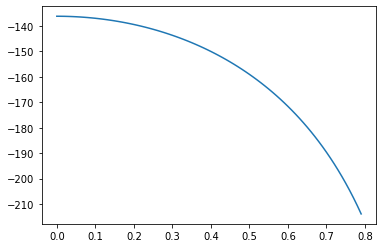

In [27]:
matplotlib.pyplot.plot(proportions, evs)